In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import pickle

In [38]:

data = pd.read_csv("Data/dataset.csv")
data.drop(['Unnamed: 0','Year','Car_Name'],axis=1,inplace =True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [29]:

import pandas as pd
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 
from sklearn.ensemble import GradientBoostingClassifier,StackingRegressor,VotingRegressor


class Ensemble(Regression):
    def __init__(self, ensemble_method,X_train, y_train, X_val, y_val,hyper_tuning_method = "grid"):
        self.ensemble_method = ensemble_method
        self.x_train = X_train
        self.y_train = y_train
        self.x_val = X_val
        self.y_val = y_val
        self.model_type = ensemble_method
        self.hyper_tuning_method = hyper_tuning_method
        self.scores_table = pd.DataFrame()
        self.estimators = None

        if self.ensemble_method == "XGBoost":
            self.model = XGBRegressor(n_jobs=-1)
        elif self.ensemble_method == "LightGbm":
            self.model = LGBMRegressor()
        elif self.ensemble_method == "Voting":
            self.model = VotingRegressor()
        
    def Stacking(self,estimators):
        self.model = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
        
        
    def Voting(self,estimators):
        self.estimators = estimators

    



## **2. Encoding categorical columns.**

In [30]:
data=pd.get_dummies(data,drop_first=True)

In [31]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [32]:

X=data.iloc[:,1:]
y=data.iloc[:,0]

In [33]:

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
print(x_train.shape)
print(y_train.shape)

(240, 8)
(240,)


In [35]:
skf = KFold(n_splits=5,random_state=42,shuffle=True)


## **Linear Regression (Baselinne)**

In [36]:
model1 = Regression('Linear Regression',x_train , y_train,x_val, y_val)
model1.get_scores({},skf)

,Model Name,Train Score,Validation Score,Score Difference
0,Linear Regression,0.87342,0.914434,-0.041014



time taken by hayper perameter for searching best perameter : 3.819896697998047 s 



,Actual,Prediction
223,8.25,7.517500
150,0.50,-0.381360
226,5.25,4.255947
296,9.50,9.007192
52,18.00,14.426934


,MSE,RMSE
train,3.262079,1.806123
validation,2.162872,1.470670


<ipython-input-25-1b8a5d586081>:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


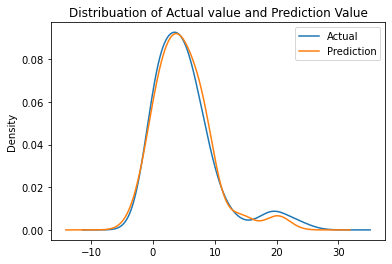

In [37]:
model1.show()

## **DecisionTreeRegressor**

In [47]:
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}


In [48]:
tree_1 = Regression('Decision Tree Regression',x_train , y_train,x_val, y_val)
tree_1.get_scores(params,skf)

,Model Name,Train Score,Validation Score,Score Difference
0,Decision Tree Regression,0.970924,0.913946,0.056978



The best hyperparameters are:  {'max_depth': 8, 'max_features': 0.8, 'max_leaf_nodes': 32, 'min_samples_split': 10} 

time taken by hayper perameter for searching best perameter : 12.981542348861694 s 



,Actual,Prediction
223,8.25,7.021429
150,0.50,0.569000
226,5.25,4.766667
296,9.50,8.348571
52,18.00,12.686000


,MSE,RMSE
train,0.749312,0.865628
validation,2.175215,1.474861


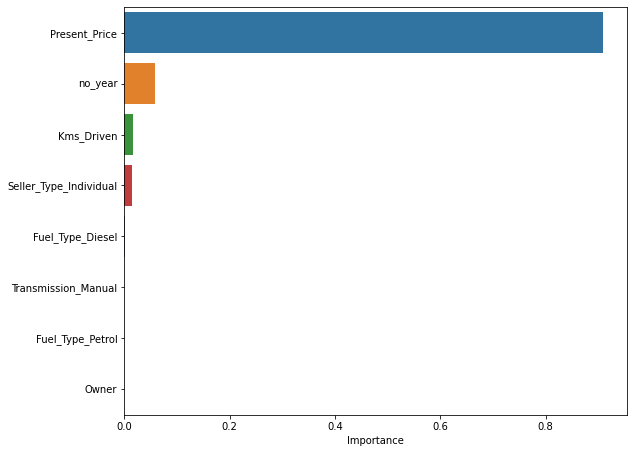

In [49]:
tree_1.get_feature_importances()

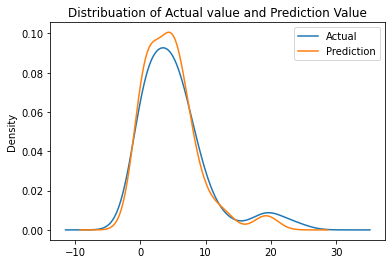

In [50]:
tree_1.show()

### **2nd Attempt**

In [51]:
params = {
    'max_depth': [11,12,13,15],
    'min_samples_split': [5,6,8,9],
    'max_features': [0.3,0.4,0.5],
    'max_leaf_nodes': [50,55,60,65,70],
}

In [52]:
tree_2 = Regression('Decision Tree Regression',x_train , y_train,x_val, y_val)
tree_2.get_scores(params,3)

,Model Name,Train Score,Validation Score,Score Difference
0,Decision Tree Regression,0.976646,0.716176,0.26047



The best hyperparameters are:  {'max_depth': 12, 'max_features': 0.4, 'max_leaf_nodes': 60, 'min_samples_split': 6} 

time taken by hayper perameter for searching best perameter : 3.1043546199798584 s 



,Actual,Prediction
223,8.25,7.510000
150,0.50,0.476923
226,5.25,4.970000
296,9.50,10.386000
52,18.00,10.386000


,MSE,RMSE
train,0.601861,0.775797
validation,7.174322,2.678492


## **Random Forest Regressor**

In [53]:
# Number of trees in random forest
n_estimators = [10,20,40,60,80,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,7,8,9,11,12,]

# Minimum number of samples required to split a node
min_samples_split = [5,8,12,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,15,20,25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [54]:
ran_for_1 = Regression('Random Forest Regression',x_train , y_train,x_val, y_val)
ran_for_1.get_scores(params,3)

,Model Name,Train Score,Validation Score,Score Difference
0,Random Forest Regression,0.973954,0.946576,0.027378



The best hyperparameters are:  {'max_depth': 15, 'max_features': 0.5, 'max_leaf_nodes': 60, 'min_samples_split': 5} 

time taken by hayper perameter for searching best perameter : 89.74913763999939 s 



,Actual,Prediction
223,8.25,7.205216
150,0.50,0.473659
226,5.25,4.880142
296,9.50,8.314388
52,18.00,14.689763


,MSE,RMSE
train,0.671218,0.819279
validation,1.350410,1.162071


## **XGBoost**

In [60]:
params = {'eta':[0.001,0.005,0.1,0.5],
          'min_child_weight':[1,3,5,7],
          "max_depth"        : [ 6, 8, 10],
          "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, ],
          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [61]:
xgboost_1 = Ensemble('XGBoost',x_train , y_train,x_val, y_val)
xgboost_1.get_scores(params,skf)

[06:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,Train Score,Validation Score,Score Difference
0,XGBoost,0.984157,0.967775,0.016382



The best hyperparameters are:  {'colsample_bytree': 0.7, 'eta': 0.001, 'gamma': 0.2, 'max_depth': 10, 'min_child_weight': 5} 

time taken by hayper perameter for searching best perameter : 97.0238618850708 s 



,Actual,Prediction
223,8.25,6.954308
150,0.50,0.684617
226,5.25,4.627176
296,9.50,8.906812
52,18.00,17.376032


,MSE,RMSE
train,0.408278,0.638966
validation,0.814564,0.902532


## **Light GBM**

In [62]:
rs_params = {
        'learning_rate':[0.0001, 0.001, 0.01],
        'bagging_fraction': [0.5,0.55,0.6,0.7,0.8],
        'bagging_frequency': [5,6,7,8],
        'feature_fraction': [0.5,0.6, 0.66, 0.7],
        'min_data_in_leaf': [90,110,120,130],
        'num_leaves': [1200, 1550],
        'max_depth': [10,12,14,15,17],
}

In [63]:
light_gbm_1 = Ensemble('LightGbm',x_train, y_train, x_val, y_val,hyper_tuning_method='random')

In [64]:
light_gbm_1.get_scores(rs_params,skf)

,Model Name,Train Score,Validation Score,Score Difference
0,LightGbm,0.317893,0.337251,-0.019359



The best hyperparameters are:  {'bagging_fraction': 0.5, 'bagging_frequency': 5, 'feature_fraction': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 90, 'num_leaves': 1200} 

time taken by hayper perameter for searching best perameter : 583.1763114929199 s 



,Actual,Prediction
223,8.25,6.555705
150,0.50,2.805922
226,5.25,4.364203
296,9.50,6.555705
52,18.00,6.555705


,MSE,RMSE
train,17.578516,4.192674
validation,16.752507,4.092983


### **2nd Attempt**

In [65]:
rs_params = {
        'learning_rate':[ 0.01,0.02,0.03],
        'bagging_fraction': [0.2,0.3,0.4],
        'bagging_frequency': [3,4],
        'feature_fraction': [0.6,0.7,0.8,0.9],
        'min_data_in_leaf': [50,60,70],
        'num_leaves': [50,100,150,200],
        'max_depth': [9,10,11],
}

In [66]:
light_gbm_2 = Ensemble('LightGbm',x_train, y_train, x_val, y_val,hyper_tuning_method='random')

In [67]:
light_gbm_2.get_scores(rs_params,skf)

,Model Name,Train Score,Validation Score,Score Difference
0,LightGbm,0.596661,0.671115,-0.074454



The best hyperparameters are:  {'bagging_fraction': 0.2, 'bagging_frequency': 3, 'feature_fraction': 0.6, 'learning_rate': 0.03, 'max_depth': 9, 'min_data_in_leaf': 50, 'num_leaves': 50} 

time taken by hayper perameter for searching best perameter : 189.61548519134521 s 



,Actual,Prediction
223,8.25,6.810590
150,0.50,0.566636
226,5.25,5.313077
296,9.50,10.897452
52,18.00,10.897452


,MSE,RMSE
train,10.394399,3.224035
validation,8.313333,2.883285


In [68]:
rs_params = {
        'learning_rate':[0.03,0.04],
        'bagging_fraction': [0.1,0.2,0.25],
        'bagging_frequency': [2,3,4],
        'min_data_in_leaf': [20,30,40],
        'num_leaves': [20,30,40,50],
        'max_depth': [9,10,11],
}

In [69]:
light_gbm_3 = Ensemble('LightGbm',x_train, y_train, x_val, y_val,hyper_tuning_method='random')

In [70]:
light_gbm_3.get_scores(rs_params,skf)

,Model Name,Train Score,Validation Score,Score Difference
0,LightGbm,0.831122,0.903183,-0.072062



The best hyperparameters are:  {'bagging_fraction': 0.1, 'bagging_frequency': 2, 'learning_rate': 0.04, 'max_depth': 9, 'min_data_in_leaf': 20, 'num_leaves': 20} 

time taken by hayper perameter for searching best perameter : 57.444124698638916 s 



,Actual,Prediction
223,8.25,6.630241
150,0.50,0.610880
226,5.25,4.724785
296,9.50,7.867624
52,18.00,17.688268


,MSE,RMSE
train,4.352142,2.086179
validation,2.447263,1.564373


## **Stacking(Linear Regression/DecisionTree)**

In [71]:
lr = model1.best_model
tr = tree_1.best_model
stacking_1 = Ensemble('Stacking',x_train , y_train,x_val, y_val)
estimators = [
     ('lr', lr),
     ('tree', tr)
 ]
stacking_1.Stacking(estimators)
stacking_1.get_scores({},skf)

,Model Name,Train Score,Validation Score,Score Difference
0,Stacking,0.942355,0.898094,0.04426



time taken by hayper perameter for searching best perameter : 0.4123871326446533 s 



,Actual,Prediction
223,8.25,6.749
150,0.50,0.465
226,5.25,4.895
296,9.50,9.531
52,18.00,15.263


,MSE,RMSE
train,1.48557,1.218839
validation,2.57590,1.604961


## **Saving All The Models**

In [74]:
for model in [model1,ran_for_1,xgboost_1,tree_2,light_gbm_3,stacking_1]:
    pickle.dump(model, open(f'Models/{model.model_type}.pkl', 'wb'))

### **All Models Compared**

In [75]:
all_models = pd.concat([model1.scores_table,
                        tree_2.scores_table,
                        ran_for_1.scores_table,
                        xgboost_1.scores_table,
                        light_gbm_3.scores_table,
                        stacking_1.scores_table],
                        axis=0)

In [76]:
all_models

,Model Name,Train Score,Validation Score,Score Difference
0,Linear Regression,0.873420,0.914434,-0.041014
0,Decision Tree Regression,0.976646,0.716176,0.260470
0,Random Forest Regression,0.973954,0.946576,0.027378
0,XGBoost,0.984157,0.967775,0.016382
0,LightGbm,0.831122,0.903183,-0.072062
0,Stacking,0.942355,0.898094,0.044260
